# NBA Player's Salary Analysis Final Report
## Team -53

- Sebastian Sy (sy.se@northeastern.edu)
- Jonathan Abadi (abadi.j@northeastern.edu)
- David Yei (yei.d@northeastern.edu)
- Ben Newfield (Newfield.b@northeastern.edu)

## Project Goal:
Explore which player statistical factor affects player salary the most and predict player salary based on stats. We will be using this three lists for our data:
- [list of all stats](https://www.basketball-reference.com/leagues/NBA_2018_per_game.html) 
- [list of advanced stats](https://www.basketball-reference.com/leagues/NBA_2018_advanced.html)
- [list of salaries](https://hoopshype.com/salaries/players/)


# Executive Summary - do this at the end

# Introduction

Our project utilizes machine learning techniques to predict NBA player salaries based on their statistics, team, and position. Recently, in the NBA, there has been a lot of controversy in regards to a player's salary in relation to their ability. Articles and pundits consistently criticize how capital is allocated towards certain athletes and not others. Meanwhile, many athletes believe their overall value is understated, and not reflected by their earnings.

This issue is not charactarized by one gargantuan event, but various rifts between players, management, and media. Recently, Dennis Schroeder refused to sign a $84m contract exension from the Los Angeles Lakers. While he clearly believes he is worth more, there are other players who arguably have more output that are earning less, which is why the negotiations between both parties are in flux. This type of conflict is uniform throughout the league, and articles describing such rifts appear on almost a monthly basis. 

There are so many potential factors that measure a player's overall value, that it is hard to understand which ones best affect their salary. We seek to mediate this through providing a tool that can help both players and GM's understand how much a player is worth, based on historical information on player salary and statistics from the 2017 to 2019 NBA season. To do so, we are going to test out four machine learning models to identify which one is the most accurate at predicting NBA player salary. We will also implement feature importance to try and understand which factors have the strongest effect on overall salary.

Read: https://bleacherreport.com/articles/2938847-lakers-rumors-dennis-schroder-rejected-4-year-84m-contract-extension-offer

## Part 1

### Overview   

We’ll scrape basketball statistics of every player from [list of all stats](https://www.basketball-reference.com/leagues/NBA_2018_per_game.html). 

<img src="https://i.ibb.co/wYYrggt/Screen-Shot-2021-03-17-at-12-42-41-PM.png" alt="Screen-Shot-2021-03-17-at-12-42-41-PM" border="0">

From this list, for each game, we can obtain:
- Position
- Age
- Team
- Games
- Games Started
- Minutes Played Per Game
- Field Goals Per Game
- Field Goal Attempts Per Game
- Field Goal Percentage
- 3-Point Field Goals Per Game
- 3-Point Field Goal Attempts Per Game
- 3-Point Field Goal Percentage
- 2 Point Field Goals Per Game
- 2 Point Field Goal Attempts Per Game
- 2 Point Field Goal Percentage
- Effective Field Goal Percentage
- Free Throws Per Game
- Free Throw Attempts Per Game
- Free Throw Percentage
- Offensive Rebounds Per Game
- Defensive Rebounds Per Game
- Total Rebounds Per Game
- Assists Per Game
- Steals Per Game
- Blocks Per Game
- Turnovers Per Game
- Personal Fouls Per Game
- Points Per Game
- True Shooting Percentage
- Win Shares
- Player Efficiency Rating
- Usage Percentage

Upon visiting the [advance box](https://www.basketball-reference.com/leagues/NBA_2018_advanced.html) we can see the advance stats of the players:

<img src="https://i.ibb.co/Hd9bpqy/Screen-Shot-2021-03-17-at-1-07-59-PM.png" alt="Screen-Shot-2021-03-17-at-1-07-59-PM" border="0">

From this list, we can obtain more sophisticated statistics that compound the basic statistics to calculate a player's overall impact on the game. We can utilize these numbers to try and see if any of them are more effective than the basic statistics at determining player value.


We’ll also be scraping data regarding player salary from this website: [list of salaries](https://hoopshype.com/salaries/players/). 

<img src="https://i.ibb.co/pbf4gBG/Screen-Shot-2021-03-17-at-1-09-45-PM.png" alt="Screen-Shot-2021-03-17-at-1-09-45-PM" border="0">

From this list, for each player, we can obtain:
- Player salary from the '16-'17 to '18-19' NBA season


### Pipeline Overview

We will accomplish this task with four functions:
- `get_url(url)`
    - returns html string of a given url
- `basketball_reference(year)`
    - builds dataframe of [all stats from seasons 16-19](https://www.basketball-reference.com/leagues/NBA_2018_per_game.html) from html string 
- `clean_advanced_df(df_samples)`
    - builds dataframe of [all advance stats from seasons 16-19](https://www.basketball-reference.com/leagues/NBA_2018_advanced.html) from html string 
- `get_salary_data(year)`
    - builds dataframe of [all players salaries](https://hoopshype.com/salaries/) from html string 
    
As well as three short scripts:
- **Scrape list of stats:** use `get_url(url)` and `basketball_reference(year)` in a loop to collect regular stats for the relevant seasons, populating a DataFrame `df_player_stats`
- **Scrape list of adv stats:** use `get_url(url)` and `clean_advanced_df(df_samples)` in a loop to collect advanced stats for the relevant seasons, populating a DataFrame `final_df`
- **Scrape list of salaries:** use `get_url(url)` and `get_salary_data(year)` in a loop to collect the salaries for all players for the relevant seasons, populating a DataFrame `df_player_salary`

Merging the DataFrame:
- We will merge each DataFrame on the player's names, creating one large DataFrame with all the players, their advanced and regular stats per season, and salary per season.


### Cleaning the Data 


- **Accent:** To clean this data we will need to first standardize player names. We are using two different sources to gather information: basketball-reference.com and hoopshype.com. In basketball-reference, players are notated with accents in their name. Meanwhile in hoopshype they are not. This is quite problematic, as it makes it hard to merge the dataframes. 
    - To fix this, we utilized unicode, which is a library that enabled us to replace all the accented names with unaccented names.
    

- **Categorical Data:** Another issue we encountered is the abundance of categorical data. A lot of important information we want to measure such as team membership and position are categorical. This makes it difficult to conduct any sort of quantitative analysis.
    - To fix this, we are changing the encoding of positions from PG, SG, SF, PF, C, and TOT, to 1, 2, 3, 4, 5, 6. Further, we are also including number encodings for the teams different players play in.
    
- **Duplicate Entries:** There are various duplicate entries for players. This is because players may move across different teams within a season. To account for this, basketball reference includes entries for each player's average statistics at a specific team, and their total average across all teams
    - To remedy this issue, we are dropping the duplicate entries for players who have played in many teams in a single season. This way, we can retain the row with their holistic statistics. While this may affect the data we find for teams in relation to salary, the overall statistics will be consistent.  
     
- **Salary Buckets:** A final issue with the data is that there are too many variances in salary. While this is okay for some machine learning models, it makes it harder for models such as K-Means, Decision Trees, and Random Forrests. For example, a confusion matrix using decision trees for every salary may have hundreds of rows and columns. 
    - To fix this, we created five separate salary buckets to place each player in. The buckets are not divided evenly, because there is an unequal distribution of players in salary intervals. For example, many players are earning between 5m to 15m, but not a lot are earning over 20m. Thus we attempted to structure the intervals to account for abnormal distribution accross player pay. 

## Part 2

In [1]:
!pip install unidecode

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import requests
from bs4 import BeautifulSoup
import time
import unidecode

In [3]:
def get_url(url):
    """ gets the html of a given url
    
    Args:
        url (str): target url
        
    Returns:
        str_html (str): html of given url
    """
    url_str = requests.get(url)
    
    soup = BeautifulSoup(url_str.text)
    
    return soup

### We first obtain the data from two different sources:

In [4]:
basketball_reference = get_url('https://www.basketball-reference.com/leagues/NBA_2017_per_game.html')

In [5]:
def basketball_reference(year):
    """ gets the statistics for all players in the NBA in a given year

    Args:
        year (int): gets the relevant year 

    Returns:
        
        df_player_stats(DataFrame): gets the DataFrame with all the players stats in a given season
    """
    
    year = str(year)
    df_player_stats = pd.DataFrame()
    
    #call the get_url function to get the html string
    basketball_reference = get_url(f'https://www.basketball-reference.com/leagues/NBA_{year}_per_game.html')
    
    #find the relevant columns needed to add to the dataframe 
    columns = []
    for row in basketball_reference.find_all('tbody'):
        for stat in row.tr:
            columns.append(stat.get('data-stat'))
    columns = columns[1:]
    
    #create the DataFrame
    df_player_stats = pd.DataFrame(columns = columns)
    
    all_stats = list()
    player_stats = list()

    tr_body = basketball_reference.find_all('tr')

    #read in all the relevant stats and ignore the subheaders 
    for stat in tr_body:
        if len(player_stats) == 29:
            all_stats.append(player_stats)
        player_stats = list()
        for item in stat.find_all('td'):
            player_stats.append(item.get_text())
    
    #include all the relevant stats per player into the DataFrame 
    for nest in range(len(all_stats)):
        df_player_stats.loc[nest] = all_stats[nest]
    
    year = int(year)
    start = year - 1
    df_player_stats['Season'] = str(start) + '-' + str(year)
        
    df_player_stats.sort_index()
    
    df_player_stats.drop_duplicates(subset = ['player'], inplace = True)
    
    df_player_stats.set_index('player',inplace = True)
    
    new_name = dict()

    #remove the accents on player names so we can merge this with the salary DataBase 
    for name in range(len(df_player_stats)):
        accented_name = str(df_player_stats.index[name])
        unnacented_name = unidecode.unidecode(accented_name)
        new_name[accented_name] = unnacented_name

    #replace accented name with unaccented names
    df_player_stats.index = df_player_stats.index.map(new_name)
    
    df_player_stats.reset_index(inplace = True)

    df_player_stats.rename(columns={'player':'Player'},inplace=True)
    
    return df_player_stats

In [6]:
df_br_2017 = basketball_reference('2017')
df_br_2018 = basketball_reference('2018')
df_br_2019 = basketball_reference('2019')

In [7]:
df_br_2017

,Player,pos,age,team_id,g,gs,mp_per_g,fg_per_g,fga_per_g,fg_pct,...,orb_per_g,drb_per_g,trb_per_g,ast_per_g,stl_per_g,blk_per_g,tov_per_g,pf_per_g,pts_per_g,Season
0,Alex Abrines,SG,23,OKC,68,6,15.5,2.0,5.0,.393,...,0.3,1.0,1.3,0.6,0.5,0.1,0.5,1.7,6.0,2016-2017
1,Quincy Acy,PF,26,TOT,38,1,14.7,1.8,4.5,.412,...,0.5,2.5,3.0,0.5,0.4,0.4,0.6,1.8,5.8,2016-2017
2,Steven Adams,C,23,OKC,80,80,29.9,4.7,8.2,.571,...,3.5,4.2,7.7,1.1,1.1,1.0,1.8,2.4,11.3,2016-2017
3,Arron Afflalo,SG,31,SAC,61,45,25.9,3.0,6.9,.440,...,0.1,1.9,2.0,1.3,0.3,0.1,0.7,1.7,8.4,2016-2017
4,Alexis Ajinca,C,28,NOP,39,15,15.0,2.3,4.6,.500,...,1.2,3.4,4.5,0.3,0.5,0.6,0.8,2.0,5.3,2016-2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
480,Thaddeus Young,PF,28,IND,74,74,30.2,4.9,9.3,.527,...,1.8,4.3,6.1,1.6,1.5,0.4,1.3,1.8,11.0,2016-2017
481,Cody Zeller,C,24,CHO,62,58,27.8,4.1,7.1,.571,...,2.2,4.4,6.5,1.6,1.0,0.9,1.0,3.0,10.3,2016-2017
482,Tyler Zeller,C,27,BOS,51,5,10.3,1.5,3.1,.494,...,0.8,1.6,2.4,0.8,0.1,0.4,0.4,1.2,3.5,2016-2017
483,Stephen Zimmerman,C,20,ORL,19,0,5.7,0.5,1.6,.323,...,0.6,1.3,1.8,0.2,0.1,0.3,0.2,0.9,1.2,2016-2017


In [8]:
frames = [df_br_2017,df_br_2018,df_br_2019]
#merge all seasons into one DataFrame
df_br_17to19 = pd.concat(frames)

In [9]:
df_br_17to19

,Player,pos,age,team_id,g,gs,mp_per_g,fg_per_g,fga_per_g,fg_pct,...,orb_per_g,drb_per_g,trb_per_g,ast_per_g,stl_per_g,blk_per_g,tov_per_g,pf_per_g,pts_per_g,Season
0,Alex Abrines,SG,23,OKC,68,6,15.5,2.0,5.0,.393,...,0.3,1.0,1.3,0.6,0.5,0.1,0.5,1.7,6.0,2016-2017
1,Quincy Acy,PF,26,TOT,38,1,14.7,1.8,4.5,.412,...,0.5,2.5,3.0,0.5,0.4,0.4,0.6,1.8,5.8,2016-2017
2,Steven Adams,C,23,OKC,80,80,29.9,4.7,8.2,.571,...,3.5,4.2,7.7,1.1,1.1,1.0,1.8,2.4,11.3,2016-2017
3,Arron Afflalo,SG,31,SAC,61,45,25.9,3.0,6.9,.440,...,0.1,1.9,2.0,1.3,0.3,0.1,0.7,1.7,8.4,2016-2017
4,Alexis Ajinca,C,28,NOP,39,15,15.0,2.3,4.6,.500,...,1.2,3.4,4.5,0.3,0.5,0.6,0.8,2.0,5.3,2016-2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
525,Trae Young,PG,20,ATL,81,81,30.9,6.5,15.5,.418,...,0.8,2.9,3.7,8.1,0.9,0.2,3.8,1.7,19.1,2018-2019
526,Cody Zeller,C,26,CHO,49,47,25.4,3.9,7.0,.551,...,2.2,4.6,6.8,2.1,0.8,0.8,1.3,3.3,10.1,2018-2019
527,Tyler Zeller,C,29,TOT,6,1,15.5,2.7,5.0,.533,...,1.8,2.2,4.0,0.7,0.2,0.5,0.7,3.3,7.7,2018-2019
528,Ante Zizic,C,22,CLE,59,25,18.3,3.1,5.6,.553,...,1.8,3.6,5.4,0.9,0.2,0.4,1.0,1.9,7.8,2018-2019


In [10]:
import requests
import pandas as pd

def get_advanced_url(year):
    """ gets the advanced stats html content for a given season

    Args:
        year (int): the ending year of a season

    Returns:
        df_advanced (dataFrame): a dataframe with every player's advanced stats
                                 for the season
    """

    # the base url
    base='https://www.basketball-reference.com/leagues/NBA_'
    
    # combines the base url with the input year
    final_url = base + str(year) + '_advanced.html'

    # reads the html from the final_url
    df_advanced = pd.read_html(final_url)[0]

    # adds the season column to the dataframe
    start = year - 1
    df_advanced['Season'] = str(start) + '-' + str(year)
    return df_advanced

df_2016_2017 = get_advanced_url(year=2017)
df_2017_2018 = get_advanced_url(year=2018)
df_2018_2019 = get_advanced_url(year=2019)

# combines three seasons of NBA advanced stats into a list
season_samples = [df_2016_2017, df_2017_2018, df_2018_2019]

In [11]:
def clean_advanced_df(df_samples):
    """ cleans the given dataframes and combines all seasons

    Args:
        df_samples (list): a list of all the dataframes with the advanced stats

    Returns:
        final_df (dataframe): a combined dataframe with all the unneccesary stats
                              removed
    """
    # iterates through every dataframe in the sample list
    for df in df_samples:
        # cleans the dataframe by deleting all unnecessary columns
        del df['Pos']
        del df['Age']
        del df['G']
        del df['MP']
        del df['3PAr']
        del df['OWS']
        del df['DWS']
        del df['WS/48']
        del df['OBPM']
        del df['DBPM']
        del df['BPM']
        del df['VORP']
        del df['Unnamed: 19']
        del df['Unnamed: 24']
        del df['FTr']
        del df['DRB%']
        del df['TRB%']
        del df['AST%']
        del df['STL%']
        del df['BLK%']
        del df['TOV%']

        # drops duplicate player rows and only keeps the player with 'TOT'
        df.drop_duplicates(subset='Player', keep='first', inplace=True)
    
    # assigns the first season to the final dataframe
    final_df = df_samples[0]
    for i in range(1, len(df_samples)):
        # appends the other nba advanced stats dataframes to the 
        # final dataframe
        final_df = final_df.append(df_samples[i])

    new_name = dict()

    #remove the accents on player names so we can merge this with the salary DataBase    
    for name in range(len(final_df)):
        accented_name = final_df['Player'].iloc[name]
        unnacented_name = unidecode.unidecode(accented_name)
        new_name[accented_name] = unnacented_name
    
    final_df['Player'] = final_df['Player'].map(new_name)
        
    return final_df

final_advanced_sample_data = clean_advanced_df(season_samples)
final_advanced_sample_data

,Rk,Player,Tm,PER,TS%,ORB%,USG%,WS,Season
0,1,Alex Abrines,OKC,10.1,.560,1.9,15.9,2.1,2016-2017
1,2,Quincy Acy,TOT,11.8,.565,3.9,16.8,0.9,2016-2017
4,3,Steven Adams,OKC,16.5,.589,13.0,16.2,6.5,2016-2017
5,4,Arron Afflalo,SAC,8.9,.559,0.7,14.4,1.4,2016-2017
6,5,Alexis Ajinca,NOP,12.9,.529,8.3,17.2,1.0,2016-2017
...,...,...,...,...,...,...,...,...,...
725,526,Trae Young,ATL,17.0,.539,2.6,28.4,3.3,2018-2019
726,527,Cody Zeller,CHO,17.2,.611,9.4,16.3,3.9,2018-2019
727,528,Tyler Zeller,TOT,17.3,.607,12.9,20.1,0.3,2018-2019
730,529,Ante Zizic,CLE,16.2,.590,10.6,18.2,2.0,2018-2019


### Notes 

Data is not perfect, doesn't account for empty columns 
Useful Link: https://stackoverflow.com/questions/54702255/using-beautifulsoup-to-find-a-attribute-called-data-stats

In [12]:
def get_salary_data(year):
    '''
    Website to scrape from: https://hoopshype.com/salaries/players
    Gets the salary of all players in the given NBA season
    Params:
    year (str): the given year of the season
    Returns:
    df_player_salary (DataFrame): DataFrame of all player names and salaries
    '''

    #Gets the pure HTML of names and salaries from the website
    resp = requests.get(f'https://hoopshype.com/salaries/players/{year}/')
    html = BeautifulSoup(resp.text)
    names_html = html.find_all('td', class_='name')
    salaries_html = html.find_all('td', style="color:black")    

    #Lists to keep track of player names and salaries
    names = []
    salaries = []

    #Gets the names and salaries of the players
    for name in names_html:
        names.append(name.text.strip())
    i = 0
    while i < len(salaries_html):
        salaries.append(salaries_html[i].get('data-value'))
        i += 2

    #Combine everything into a DataFrame
    names = names[1:]
    player_salary_dict = {}
    player_salary_dict['player'] = names;
    player_salary_dict['salary'] = salaries;
    player_salary_dict['Season'] = year

    #Returns the DataFrame
    df_player_salary = pd.DataFrame(player_salary_dict)

    #Renames the player column so it can be used to join the Dataframes later on
    df_player_salary.rename(columns={'player':'Player'},inplace=True)

    return df_player_salary

## NBA Player  Salaries

In [13]:
year17 = get_salary_data('2016-2017')
year18 = get_salary_data('2017-2018')
year19 = get_salary_data('2018-2019')

In [14]:
year17

,Player,salary,Season


In [15]:
year18

,Player,salary,Season


In [16]:
year19

,Player,salary,Season
0,Stephen Curry,37457154,2018-2019
1,Russell Westbrook,35665000,2018-2019
2,Chris Paul,35654150,2018-2019
3,LeBron James,35654150,2018-2019
4,Kyle Lowry,32700000,2018-2019
...,...,...,...
571,Dusty Hannahs,47370,2018-2019
572,Kendrick Nunn,47370,2018-2019
573,Richard Solomon,47370,2018-2019
574,Cody Demps,47370,2018-2019


In [17]:
frames = [year17,year18,year19]
#merge all seasons into one DataFrame
df_salaries = pd.concat(frames)

In [18]:
df_salaries

,Player,salary,Season
0,Stephen Curry,37457154,2018-2019
1,Russell Westbrook,35665000,2018-2019
2,Chris Paul,35654150,2018-2019
3,LeBron James,35654150,2018-2019
4,Kyle Lowry,32700000,2018-2019
...,...,...,...
571,Dusty Hannahs,47370,2018-2019
572,Kendrick Nunn,47370,2018-2019
573,Richard Solomon,47370,2018-2019
574,Cody Demps,47370,2018-2019


### Merging Salaries into the Greater DataFrame

In [19]:
#merge the salaries and regular season stats
stats_season = pd.merge(df_salaries,df_br_17to19,on = ['Player', 'Season'])
#merge the merged DataFrame with regular season stats with advanced stats
all_stats_salary = pd.merge(stats_season,final_advanced_sample_data,on = ['Player','Season'])
all_stats_salary

,Player,salary,Season,pos,age,team_id,g,gs,mp_per_g,fg_per_g,...,tov_per_g,pf_per_g,pts_per_g,Rk,Tm,PER,TS%,ORB%,USG%,WS
0,Stephen Curry,37457154,2018-2019,PG,30,GSW,69,69,33.8,9.2,...,2.8,2.4,27.3,124,GSW,24.4,.641,2.2,30.4,9.7
1,Russell Westbrook,35665000,2018-2019,PG,30,OKC,73,73,36.0,8.6,...,4.5,3.4,22.9,506,OKC,21.1,.501,4.1,30.9,6.8
2,Chris Paul,35654150,2018-2019,PG,33,HOU,58,58,32.0,5.2,...,2.6,2.5,15.6,399,HOU,19.7,.560,2.1,22.5,6.6
3,LeBron James,35654150,2018-2019,SF,34,LAL,55,55,35.2,10.1,...,3.6,1.7,27.4,258,LAL,25.6,.588,3.1,31.6,7.2
4,Kyle Lowry,32700000,2018-2019,PG,32,TOR,65,65,34.0,4.7,...,2.8,2.6,14.2,313,TOR,16.5,.562,2.1,19.6,6.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
485,Jemerrio Jones,52170,2018-2019,SF,23,LAL,6,2,23.8,2.0,...,0.8,1.7,4.5,273,LAL,12.1,.398,11.8,11.3,0.2
486,Jordan Sibert,47370,2018-2019,SG,26,ATL,1,0,4.0,1.0,...,0.0,0.0,3.0,448,ATL,29.7,1.500,0.0,10.2,0.0
487,Isaac Humphries,47370,2018-2019,C,21,ATL,5,1,11.2,1.2,...,0.0,1.4,3.0,240,ATL,3.4,.357,7.4,15.2,-0.1
488,Tahjere McCall,47370,2018-2019,SG,24,BRK,1,0,8.0,2.0,...,0.0,2.0,4.0,332,BRK,9.6,.581,0.0,18.1,0.0


In [20]:
def map_position(p):
    if p == "PG":
        return 1
    elif p == 'SG':
        return 2
    elif p == 'SF':
        return 3
    elif p == 'PF':
        return 4
    elif p == 'C':
        return 5
    else:
        return 6

In [21]:
def map_team(p):
    if t == "ATL":
        return 1
    elif p == 'BRK':
        return 2
    elif p == 'BOS':
        return 3
    elif p == 'CHO':
        return 4
    elif p == 'CHI':
        return 5
    elif p == 'CLE':
        return 6
    elif p == 'DAL':
        return 7
    elif p == 'DEN':
        return 8
    elif p == 'DET':
        return 9
    elif p == 'GSW':
        return 10
    elif p == 'HOU':
        return 11
    elif p == 'IND':
        return 12
    elif p == 'LAC':
        return 13
    elif p == 'LAL':
        return 14
    elif p == 'MEM':
        return 15
    elif p == 'MIA':
        return 16
    elif p == 'MIL':
        return 17
    elif p == 'MIN':
        return 18
    elif p == 'NOP':
        return 19
    elif p == 'NYK':
        return 20
    elif p == 'OKC':
        return 21
    elif p == 'ORL':
        return 22
    elif p == 'PHI':
        return 23
    elif p == 'PHX':
        return 24
    elif p == 'POR':
        return 25
    elif p == 'SAC':
        return 26
    elif p == 'SAS':
        return 27
    elif p == 'TOR':
        return 28
    elif p == 'UTA':
        return 29
    elif p == 'WAS':
        return 30
    else:
        return 31

In [22]:
list_salary = list()
#5 0 to 5
#3 from 5 to 10
#2 from 10 to 20
#1 from 20 to 30
# 30 + 
for salary in all_stats_salary['salary']:
    
    salary = int(salary)
    
    if salary <= 1000000:     
        list_salary.append("Salary <= $1m")
    
    elif 1000000 < salary <= 3000000:
        list_salary.append("1m < Salary <= 3m")
    
    elif 3000000 < salary <= 5000000:
        list_salary.append("3m < Salary <= 5m")
    
    elif 5000000 < salary <= 20000000:
        list_salary.append("5m < Salary <= 20m")
        
    elif 20000000 < salary <= 30000000:
        list_salary.append("20m < Salary <= 30m")
        
    else:
        list_salary.append("Salary > 30m")
    
all_stats_salary['salary_interval'] = list_salary

In [23]:
all_stats_salary.head()

,Player,salary,Season,pos,age,team_id,g,gs,mp_per_g,fg_per_g,...,pf_per_g,pts_per_g,Rk,Tm,PER,TS%,ORB%,USG%,WS,salary_interval
0,Stephen Curry,37457154,2018-2019,PG,30,GSW,69,69,33.8,9.2,...,2.4,27.3,124,GSW,24.4,.641,2.2,30.4,9.7,Salary > 30m
1,Russell Westbrook,35665000,2018-2019,PG,30,OKC,73,73,36.0,8.6,...,3.4,22.9,506,OKC,21.1,.501,4.1,30.9,6.8,Salary > 30m
2,Chris Paul,35654150,2018-2019,PG,33,HOU,58,58,32.0,5.2,...,2.5,15.6,399,HOU,19.7,.560,2.1,22.5,6.6,Salary > 30m
3,LeBron James,35654150,2018-2019,SF,34,LAL,55,55,35.2,10.1,...,1.7,27.4,258,LAL,25.6,.588,3.1,31.6,7.2,Salary > 30m
4,Kyle Lowry,32700000,2018-2019,PG,32,TOR,65,65,34.0,4.7,...,2.6,14.2,313,TOR,16.5,.562,2.1,19.6,6.6,Salary > 30m


## Part 3 Data Visualization

### Correlation Matrix

In [24]:
import seaborn as sns

In [25]:
#get the relevant statistics 
main_stats = all_stats_salary[['salary','gs','mp_per_g','fg_per_g','fga_per_g','tov_per_g','trb_per_g','ast_per_g','stl_per_g','blk_per_g','pts_per_g','PER','TS%','USG%','WS']].astype('float')

In [26]:
#create a correlation matrix
main_stats.corr()

,salary,gs,mp_per_g,fg_per_g,fga_per_g,tov_per_g,trb_per_g,ast_per_g,stl_per_g,blk_per_g,pts_per_g,PER,TS%,USG%,WS
salary,1.000000,0.559649,0.615880,0.641806,0.632118,0.618187,0.550650,0.552881,0.538486,0.331598,0.652651,0.353968,0.189111,0.331582,0.607212
gs,0.559649,1.000000,0.823837,0.775040,0.763410,0.690389,0.616538,0.598579,0.645393,0.438239,0.767273,0.344308,0.226059,0.299103,0.741271
mp_per_g,0.615880,0.823837,1.000000,0.883415,0.895580,0.791037,0.669729,0.700928,0.759945,0.430963,0.881669,0.368560,0.278868,0.300809,0.704097
fg_per_g,0.641806,0.775040,0.883415,1.000000,0.976433,0.853234,0.701941,0.689408,0.671690,0.451004,0.990434,0.532480,0.315343,0.584839,0.773009
fga_per_g,0.632118,0.763410,0.895580,0.976433,1.000000,0.862049,0.610362,0.727589,0.695620,0.349473,0.982479,0.436332,0.213440,0.601043,0.690996
tov_per_g,0.618187,0.690389,0.791037,0.853234,0.862049,1.000000,0.610121,0.854375,0.682834,0.338495,0.861902,0.387128,0.167798,0.567729,0.623456
trb_per_g,0.550650,0.616538,0.669729,0.701941,0.610362,0.610121,1.000000,0.364663,0.489000,0.699416,0.669579,0.506528,0.302622,0.279096,0.731685
ast_per_g,0.552881,0.598579,0.700928,0.689408,0.727589,0.854375,0.364663,1.000000,0.699642,0.150656,0.700545,0.326373,0.111304,0.408376,0.537537
stl_per_g,0.538486,0.645393,0.759945,0.671690,0.695620,0.682834,0.489000,0.699642,1.000000,0.326710,0.674438,0.325347,0.117877,0.270188,0.585878
blk_per_g,0.331598,0.438239,0.430963,0.451004,0.349473,0.338495,0.699416,0.150656,0.326710,1.000000,0.415122,0.415021,0.290183,0.109188,0.571174


Text(0.5, 0.98, 'Correlation of Statistics and Salary')

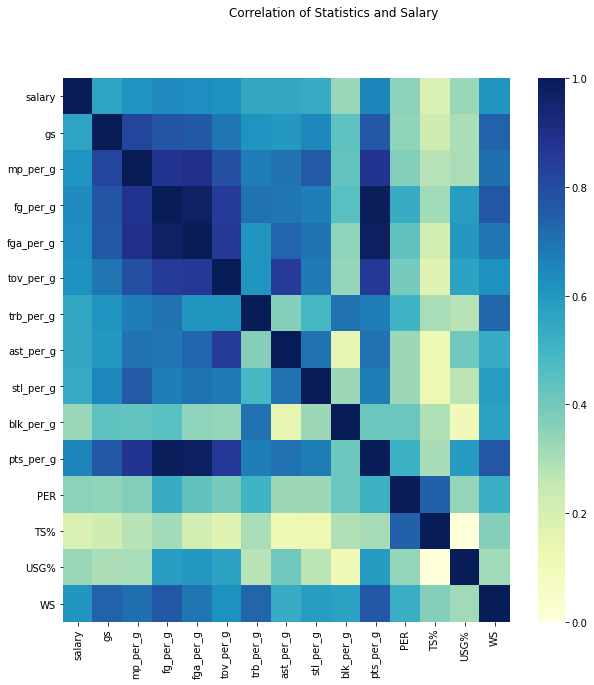

In [27]:
#plot the correlation matrix
sns.heatmap(main_stats.corr(), vmin=0, vmax=1, cmap='YlGnBu')
plt.gcf().set_size_inches(10, 10)
plt.suptitle('Correlation of Statistics and Salary')

### Description 

The plot above shows the overall correlation between different statistics of NBA players. The darker the hue of blue, the higher the correlation. This was done on a range between 0 and 1, because there were no correlation values below 0. For our study, we are concerned with the extent to statistics can influence a player's salary. We see that salary is most strongly correlated with:


> Points per Game


> Field goals Attempted


> Minutes per Game


> Win Shares


> Games started 

On the other hand, salary is least correlated with:


> Steals per game


> Blocks per game


> True Shooting Percentage


> Usage Rate 

# Stripplot Graph


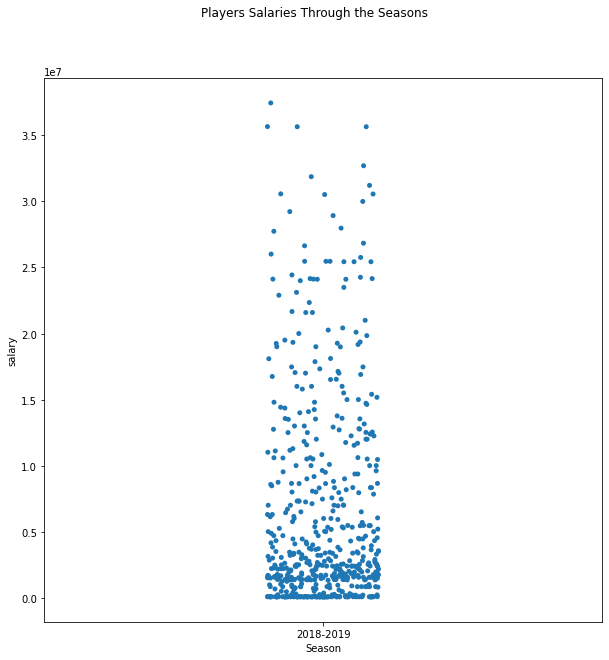

In [28]:
#Plot the stripplot graph shwoing player salaries
plt.figure(figsize=(10,10))
ax = sns.stripplot(x=df_salaries["Season"], y=pd.to_numeric(df_salaries["salary"]), data=df_salaries)
plt.suptitle("Players Salaries Through the Seasons")
ax.set_yscale("linear")

### Description

This graph compares the players salaries in through 3 different seasons. We can see that more players are skewed towards the lower salary side, and as the salary increases, there are fewer and fewer players. We can also see an increase in top salary in the last couple of seasons, giving the players more value.

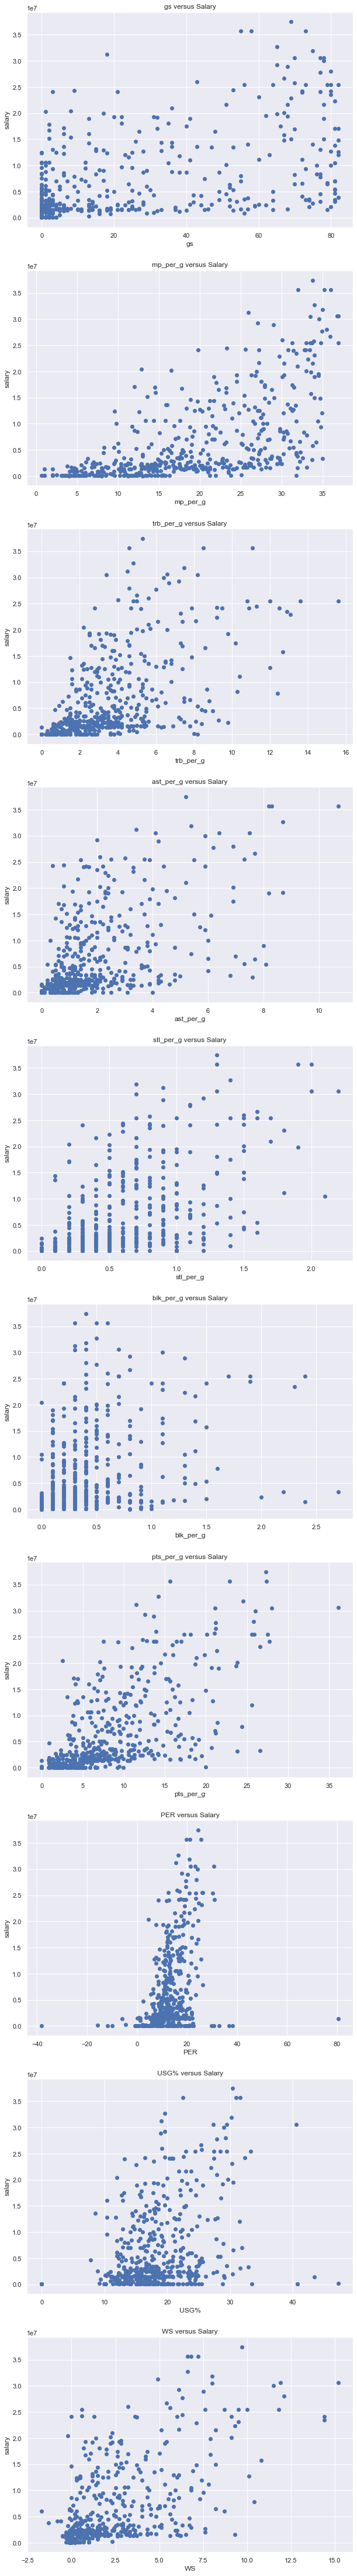

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set()

notable_feature = ['gs', 'mp_per_g', 'trb_per_g', 'ast_per_g',
           'stl_per_g', 'blk_per_g','pts_per_g', 'PER', 'USG%', 'WS']

for feature in range(len(notable_feature)):
    
    plt.subplot(len(notable_feature),1, feature+1)
        
    plt.scatter(x = all_stats_salary[notable_feature[feature]].astype(float), y= all_stats_salary['salary'].astype(int))
    
    plt.title(f'{notable_feature[feature]} versus Salary')
    plt.xlabel(notable_feature[feature])
    plt.ylabel('salary')
        
plt.gcf().set_size_inches(10, 80)

### Description

The plots above are scatter charts which compare overall player salary with a different statistic or factor. There are six total subplots. The statistics being compared against salary are games started, minutes per game, total rebounds per game, assists per game, steals per game, blocks per game, points per game, PER, USG rate, and Win Shares. 

Here are some findings we uncovered based on these charts:

- There seems to be no pattern between number of games started and total salary.  
- As minutes per game increase, there seems to be a slight, positive trend towards overall salary increasing
- As total rebounds per game increases there seeems to be a weak, positive trend for salary increasing. There seem to be a lot of players with a high amount of rebounds per game with salaries below 20m.
- As the total assists per game increases there is a weak positive trend for overal salaries increasing. 
- As the total steals per game increases there is a weak positive trend for overal salaries increasing. 
- As the total blocks per game increases there is a very weak positive trend for overal salaries increasing. The overall trend is actually quite unclear as many players with high amount of blocks have a low salary.
- As points per game increases, salary increases too. There seems to be a moderately strong positive trend for this relationship. 
- As PER increases, salary increases too. There seems to be a strong positive trend for this relationship. 
- There seems to be a moderate to weak positive relationship between usage rate and salary. There are lots ofp layers with a very high usage rate with low salary. 
- There seems to be a moderate to weak positive relationship between win shares and salary. 


## Part 4 - Method - @ben can write about the regression stuff more inclusive polynomial, exponential

Project goal: explore which player statistical factor affects player salary the most and build a trainer that can aptly predict player salary. 

We will split our data into training data and test data. We are investigating the correlation between different stats vs. salary, hence the player statistics will be trained as X, and salary as Y. For the prediction, the input will be all categories of player statistics, and the output would be the prediction of the player's salary with the input statistics.

**i. discuss why one algorithm may be chosen over the others**

We could use decision trees and multivariate regression. Multivariate regression is a model which uses more than one input variable to predict the outcome. Decision tress on the other hand captures non-linearity in the data by dividing the space into smaller sub-spaces based on the problem. NBA player salaries are not very linear, since very few top players gets paid exponentially more than average players. For example, Lebron James and a few othet top players get paid at around 40 million per year, while a lot of other players get paid 20, and more paid even lower less than 10 million. So in this case, we would prefer decision trees over linear regression due to the non-linearity in the data. 

Random Forrest presents the same benefits as decision trees, but may be superior to Decision Trees as it is less prone to over-fitting. While Random Forrest is a lot slower than a Decision Tree, it may be superior in developing a more accurate model, as it does not rely on a singular decision, and instead uses various randomized decisions before making a final judgement based on the majority. The main issue with this model, is it may be prone to being biased towards certain features.

Multi variate regression could be helpful because it uses multiple input variables to predict the output which is helpful for predicting NBA salary because of how many factors can go into that. The main issue with this model is that non-linear data is hard to predict and NBA players salaries aren't linear. However, having multiple inputs  may help with the accuracy of the model. Overall, we expect Random Forrest to be the most accurate.

**ii. describe what subset of a whole suite of similar algorithms  you’ll apply (its ok to say, ‘we’re going to try all of these because we don’t have reason to think one should be better than another’)**

We want to try out linear regression, decision trees, and random forests. Based on the data, as explained previously, we think that decisions trees and random forrests would work better. However, we don't know for sure. So we would like to try out all of these methods and then figure out which one is the best based, by calculating the error on using the training data the predict player salary. We are also going to use K-Means analysis, to see if it could potentially provide interesting insights. 

In [30]:
#Testing data of a player's statistics
sample_input = {
    'pos': 'SF',
    'age': 32,
    'g': 74,
    'gs': 74,
    'mp_per_g': 37.8,
    'fg_per_g': 9.9,
    'fga_per_g': 18.2,
    'fg_pct': .548, 
    'fg3_per_g': 1.7,
    'fg3a_per_g': 4.6, 
    'fg3_pct': .363, 
    'fg2_per_g': 8.3, 
    'fg2a_per_g': 13.5, 
    'fg2_pct': .611,
    'efg_pct': .594, 
    'ft_per_g': 4.8, 
    'fta_per_g': 7.2, 
    'ft_pct': .674, 
    'orb_per_g': 1.3,
    'drb_per_g': 7.3,
    'trb_per_g': 8.6,
    'ast_per_g': 8.7,
    'stl_per_g': 1.2, 
    'blk_per_g': 0.6, 
    'tov_per_g': 4.1,
    'pf_per_g': 1.8, 
    'pts_per_g': 26.4, 
    'Rk': 22.0, 
    'PER': 27.0,
    'TS%': .619, 
    'ORB%': 4.0,
    'USG%': 30.0,
    'WS': 12.9
}

#Output that predicts the player's salary
sample_output = 24342230

## Random Forest Classifier

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, r2_score
import numpy as np


x_feat_list = [ 'pos', 'Tm','age', 'g', 'gs', 'mp_per_g', 'fg_per_g', 'fga_per_g',
               'fg_pct', 'fg3_per_g', 'fg3a_per_g','fg3_pct', 'fg2_per_g', 'fg2a_per_g', 
               'fg2_pct', 'efg_pct', 'ft_per_g', 'fta_per_g', 'ft_pct', 'orb_per_g', 'drb_per_g', 'trb_per_g', 'ast_per_g',
               'stl_per_g', 'blk_per_g', 'tov_per_g', 'pf_per_g', 'pts_per_g', 'PER', 'TS%', 'ORB%', 'USG%', 'WS']
y_feat = 'salary_interval'

pos_nums = []
for p in all_stats_salary['pos']:
    pos_nums.append(map_position(p))
pos_teams = []
for t in all_stats_salary['Tm']:
    pos_teams.append(map_team(t))
    
all_stats_salary['pos'] = pos_nums
all_stats_salary['Tm'] = pos_teams
all_stats_salary.replace('', 0, inplace=True)
all_stats_salary.replace(np.nan, 0, inplace=True)


features = all_stats_salary[x_feat_list]
target = all_stats_salary[y_feat]

X_train_count, X_test_count, y_train, y_test = train_test_split(features, target, random_state = 3000)
y_train

279      1m < Salary <= 3m
460          Salary <= $1m
246      1m < Salary <= 3m
417          Salary <= $1m
479          Salary <= $1m
              ...         
26     20m < Salary <= 30m
437          Salary <= $1m
430          Salary <= $1m
257      1m < Salary <= 3m
51      5m < Salary <= 20m
Name: salary_interval, Length: 367, dtype: object

In [32]:
y_train

279      1m < Salary <= 3m
460          Salary <= $1m
246      1m < Salary <= 3m
417          Salary <= $1m
479          Salary <= $1m
              ...         
26     20m < Salary <= 30m
437          Salary <= $1m
430          Salary <= $1m
257      1m < Salary <= 3m
51      5m < Salary <= 20m
Name: salary_interval, Length: 367, dtype: object

In [33]:
pd.options.display.max_columns = None
X_train_count

,pos,Tm,age,g,gs,mp_per_g,fg_per_g,fga_per_g,fg_pct,fg3_per_g,fg3a_per_g,fg3_pct,fg2_per_g,fg2a_per_g,fg2_pct,efg_pct,ft_per_g,fta_per_g,ft_pct,orb_per_g,drb_per_g,trb_per_g,ast_per_g,stl_per_g,blk_per_g,tov_per_g,pf_per_g,pts_per_g,PER,TS%,ORB%,USG%,WS
279,2,1,20,75,59,27.3,3.7,8.8,.419,1.8,4.7,.385,1.9,4.1,.457,.522,0.5,0.7,.732,0.8,2.5,3.3,2.9,0.9,0.3,1.5,2.1,9.7,10.1,.533,3.0,15.7,1.5
460,3,16,24,15,1,10.7,1.2,3.1,.391,0.7,2.3,.286,0.5,0.7,.727,.500,0.3,0.4,.667,0.1,1.1,1.3,0.3,0.3,0.0,0.3,0.7,3.3,7.6,.514,1.3,14.0,0.2
246,4,3,23,41,1,6.1,0.9,1.9,.455,0.2,0.7,.321,0.6,1.2,.531,.513,0.4,0.5,.682,0.6,0.7,1.3,0.4,0.2,0.2,0.4,0.8,2.3,12.4,.542,9.8,17.5,0.5
417,1,31,24,17,0,11.0,0.9,3.1,.302,0.3,1.5,.200,0.6,1.6,.393,.349,1.0,1.1,.944,0.4,0.8,1.2,1.4,0.2,0.1,0.7,2.0,3.2,5.8,.443,3.4,16.8,-0.1
479,1,6,21,1,0,2.0,0.0,0.0,0,0.0,0.0,0,0.0,0.0,0,0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26,4,17,24,72,72,32.8,10.0,17.3,.578,0.7,2.8,.256,9.3,14.5,.641,.599,6.9,9.5,.729,2.2,10.3,12.5,5.9,1.3,1.5,3.7,3.2,27.7,30.9,.644,7.3,32.3,14.4
437,2,2,23,18,0,11.7,1.4,4.1,.342,0.7,2.6,.261,0.7,1.5,.481,.425,1.1,1.2,.864,0.2,1.8,2.0,1.2,0.3,0.0,1.0,0.8,4.5,8.1,.490,2.0,20.0,0.0
430,5,14,23,24,0,15.5,2.7,4.6,.591,0.0,0.1,.000,2.7,4.5,.602,.591,1.1,2.0,.563,2.0,2.1,4.1,0.5,0.3,0.3,0.7,2.6,6.5,15.1,.599,13.6,16.4,1.0
257,2,31,27,63,60,29.8,3.9,9.4,.412,2.3,6.2,.377,1.5,3.2,.483,.537,1.2,1.3,.859,0.3,2.4,2.7,2.0,0.6,0.2,1.0,1.7,11.3,10.5,.563,1.2,15.8,3.1


In [34]:
def plot_feat_import(feat_list, feat_import, sort=True, limit=None):
    # from lecture 18
    """ function for plotting the feature importance
    
    Args:
        feat_list (list): name of the features
        feat_import (np.array): this is where the feature importances goes
        sort (bool): enables users to select how it's sorted, through this features
        are sorted from least to most important
        limit (int): limits number of features shown if passed 
        
    Returns:
        plt.barh (plot): hortizontal bar chart that shows the feature importance 
    """
    
    if sort:
        # sort features in decreasing importance
        idx = np.argsort(feat_import).astype(int)
        feat_list = [feat_list[_idx] for _idx in idx]
        feat_import = feat_import[idx] 
        
    if limit is not None:
        # limit to the first limit feature
        feat_list = feat_list[:limit]
        feat_import = feat_import[:limit]
    
    # creates the plot and labels by feature importance
    plt.barh(feat_list, feat_import)
    plt.gcf().set_size_inches(5, len(feat_list) / 2)
    plt.xlabel('Feature importance\n(% decrease in Gini due to each feature)')

Text(0.5, 1.0, 'How Accurate is this classifer? 0.5612244897959183')

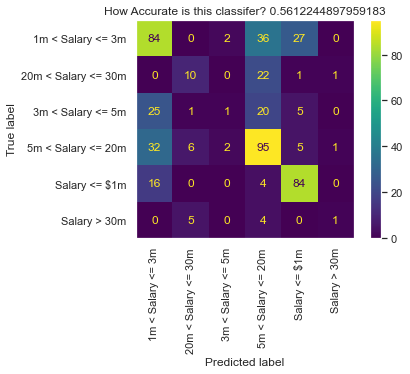

In [35]:
from sklearn import tree
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, r2_score
from sklearn.model_selection import StratifiedKFold

#creates variables for Random Forest and KFold
cv = StratifiedKFold(n_splits= 10, shuffle=True)
rfc = RandomForestClassifier(max_depth=35)

#boolean indexing to get correct isolate the correct data from the DataFrame
x = all_stats_salary.loc[:,x_feat_list].values
y_true = all_stats_salary.loc[:, y_feat].values

y_pred = np.empty_like(y_true)

for train_index, test_index in cv.split(x, y_true):
    
    #get the training and testing data for X
    x_trainer = x[train_index, :]
    x_tester = x[test_index, :]
    
    #get the training and testing data for Y
    y_trainer = y_true[train_index]
    
    #calculate the fit
    rfc.fit(x_trainer, y_trainer)
    y_pred[test_index] = rfc.predict(x_tester)
    
#create the confusion matrix
con_matrix = confusion_matrix(y_true, y_pred)
    
#calculate accuracy
accuracy = (np.diag(con_matrix).sum())/(con_matrix.sum())
    
#plot the charts
fig = ConfusionMatrixDisplay(confusion_matrix=con_matrix, display_labels=rfc.classes_)
fig.plot(xticks_rotation='vertical')
plt.grid(False)
fig.ax_.set_title(f'How Accurate is this classifer? {accuracy}')

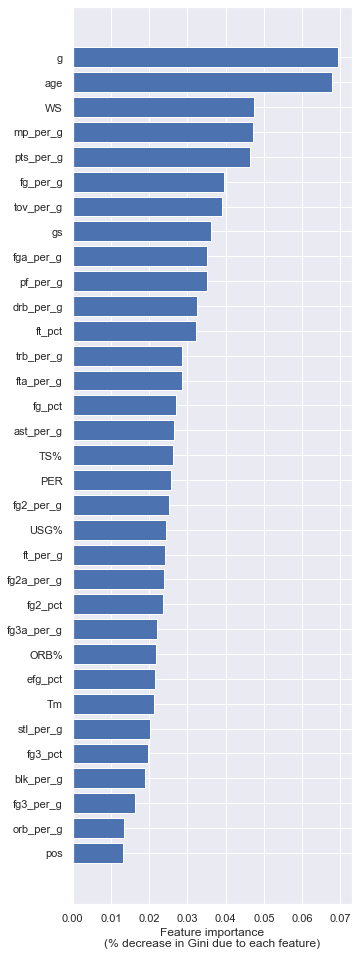

In [36]:
#feature importance of random forrest model
plot_feat_import(x_feat_list,rfc.feature_importances_, limit=None, sort = True)

Text(0.5, 1.0, 'How Accurate is this classifer? 0.44081632653061226')

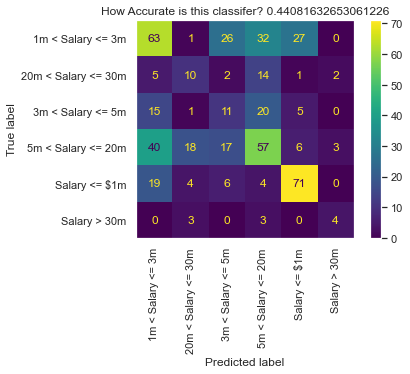

In [37]:
from sklearn.tree import DecisionTreeClassifier

#creates variables for Random Forest and KFold
cv = StratifiedKFold(n_splits= 8, shuffle=True)
rfc = DecisionTreeClassifier(max_depth=35)

#boolean indexing to get correct isolate the correct data from the DataFrame
x = all_stats_salary.loc[:,x_feat_list].values
y_true = all_stats_salary.loc[:, y_feat].values

y_pred = np.empty_like(y_true)

for train_index, test_index in cv.split(x, y_true):
    
    #get the training and testing data for X
    x_trainer = x[train_index, :]
    x_tester = x[test_index, :]
    
    #get the training and testing data for Y
    y_trainer = y_true[train_index]
    
    #calculate the fit
    rfc.fit(x_trainer, y_trainer)
    y_pred[test_index] = rfc.predict(x_tester)
    
#create the confusion matrix
con_matrix = confusion_matrix(y_true, y_pred)
    
#calculate accuracy
accuracy = (np.diag(con_matrix).sum())/(con_matrix.sum())
    
#plot the charts
fig = ConfusionMatrixDisplay(confusion_matrix=con_matrix, display_labels=rfc.classes_)
fig.plot(xticks_rotation='vertical')
plt.grid(False)
fig.ax_.set_title(f'How Accurate is this classifer? {accuracy}')

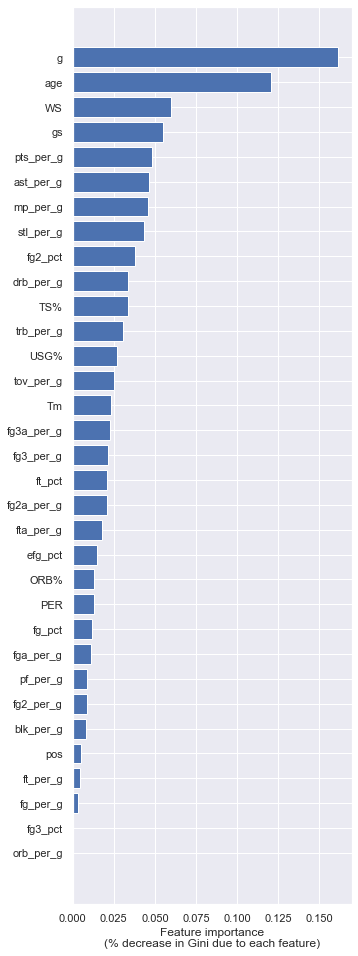

In [38]:
plot_feat_import(x_feat_list,rfc.feature_importances_, limit=None, sort = True)

Text(0.5, 1.0, 'How Accurate is this classifer? 0.5')

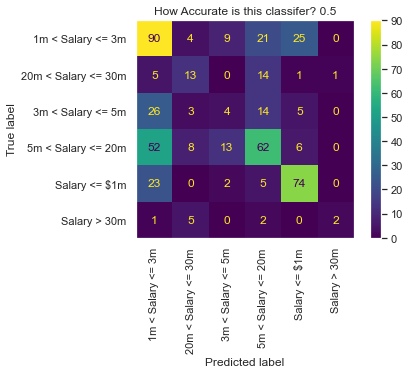

In [39]:
from sklearn.neighbors import KNeighborsClassifier

#creates variables for Random Forest and KFold
cv = StratifiedKFold(n_splits= 8, shuffle=True)
rfc = KNeighborsClassifier(n_neighbors=5)

#boolean indexing to get correct isolate the correct data from the DataFrame
x = all_stats_salary.loc[:,x_feat_list].values
y_true = all_stats_salary.loc[:, y_feat].values

y_pred = np.empty_like(y_true)

for train_index, test_index in cv.split(x, y_true):
    
    #get the training and testing data for X
    x_trainer = x[train_index, :]
    x_tester = x[test_index, :]
    
    #get the training and testing data for Y
    y_trainer = y_true[train_index]
    
    #calculate the fit
    rfc.fit(x_trainer, y_trainer)
    y_pred[test_index] = rfc.predict(x_tester)
    
#create the confusion matrix
con_matrix = confusion_matrix(y_true, y_pred)
    
#calculate accuracy
accuracy = (np.diag(con_matrix).sum())/(con_matrix.sum())
    
#plot the charts
fig = ConfusionMatrixDisplay(confusion_matrix=con_matrix, display_labels=rfc.classes_)
fig.plot(xticks_rotation='vertical')
plt.grid(False)
fig.ax_.set_title(f'How Accurate is this classifer? {accuracy}')

In [40]:
bool_salary = all_stats_salary['salary'].astype(int) > 20000000
high_salary_players = all_stats_salary.loc[bool_salary,:]

In [41]:
high_salary_players.tail()

,Player,salary,Season,pos,age,team_id,g,gs,mp_per_g,fg_per_g,fga_per_g,fg_pct,fg3_per_g,fg3a_per_g,fg3_pct,fg2_per_g,fg2a_per_g,fg2_pct,efg_pct,ft_per_g,fta_per_g,ft_pct,orb_per_g,drb_per_g,trb_per_g,ast_per_g,stl_per_g,blk_per_g,tov_per_g,pf_per_g,pts_per_g,Rk,Tm,PER,TS%,ORB%,USG%,WS,salary_interval
39,Danilo Gallinari,21587579,2018-2019,3,30,LAC,68,68,30.3,6.0,13.0,.463,2.4,5.5,.433,3.6,7.5,.484,.554,5.4,6.0,.904,0.8,5.3,6.1,2.6,0.7,0.3,1.5,1.9,19.8,177,13,21.0,.633,2.9,23.8,8.2,20m < Salary <= 30m
40,Victor Oladipo,21000000,2018-2019,2,26,IND,36,36,31.9,6.9,16.3,.423,2.1,6.0,.343,4.9,10.3,.470,.486,2.9,3.9,.730,0.6,5.0,5.6,5.2,1.7,0.3,2.3,2.0,18.8,389,12,17.6,.519,2.1,27.9,2.3,20m < Salary <= 30m
41,Ryan Anderson,20421546,2018-2019,4,30,TOT,25,8,12.9,0.8,2.8,.304,0.4,1.6,.225,0.5,1.2,.414,.370,0.5,0.6,.750,0.7,1.4,2.2,0.8,0.2,0.0,0.6,1.0,2.5,16,31,4.6,.414,6.1,12.0,-0.2,20m < Salary <= 30m
42,Joakim Noah,20261172,2018-2019,5,33,MEM,42,1,16.5,2.6,5.1,.516,0.0,0.0,.000,2.6,5.0,.519,.516,1.9,2.6,.716,1.4,4.3,5.7,2.1,0.5,0.7,1.2,2.3,7.1,376,15,18.6,.571,9.2,20.0,2.2,20m < Salary <= 30m
43,Kyrie Irving,20099189,2018-2019,1,26,BOS,67,67,33.0,9.0,18.5,.487,2.6,6.5,.401,6.4,12.0,.533,.557,3.2,3.7,.873,1.1,3.9,5.0,6.9,1.5,0.5,2.6,2.5,23.8,249,3,24.3,.592,3.4,29.6,9.1,20m < Salary <= 30m


In [42]:
# booelan indexing to filter proper data from the Dataframe
x = high_salary_players.loc[:, x_feat_list].values
y = high_salary_players.loc[:, 'salary'].values

#calls the RandomForest 
rf_clf = RandomForestClassifier(n_estimators=100)

rf_clf.fit(x, y)

RandomForestClassifier()

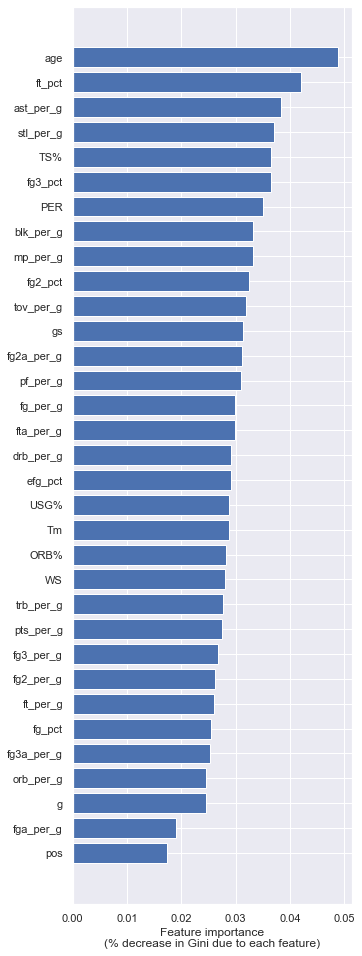

In [43]:
plot_feat_import(x_feat_list,rf_clf.feature_importances_, limit=None, sort = True)

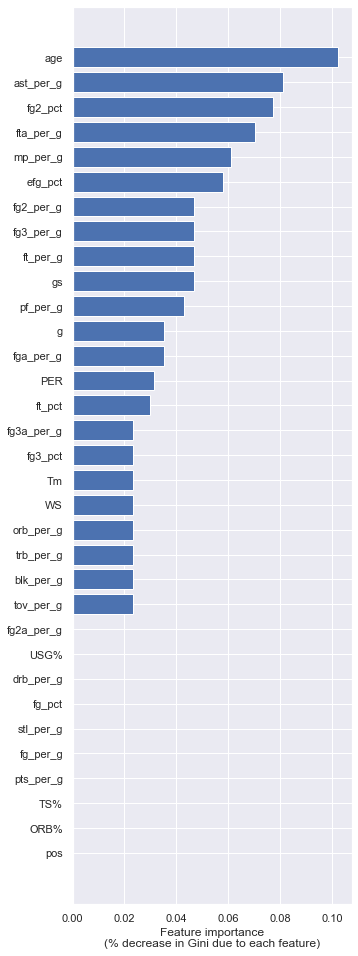

In [44]:
# booelan indexing to filter proper data from the Dataframe
x = high_salary_players.loc[:, x_feat_list].values
y = high_salary_players.loc[:, 'salary'].values

#calls the RandomForest 
rf_clf = DecisionTreeClassifier(max_depth=35)

rf_clf.fit(x, y)

plot_feat_import(x_feat_list,rf_clf.feature_importances_, limit=None, sort = True)

In [45]:
from sklearn.linear_model import LinearRegression

x_feat_list = ['pts_per_g', 'fga_per_g', 'mp_per_g', 'WS', 'gs']

multi = LinearRegression()

# get target variable
x = main_stats.loc[:, x_feat_list].values
y = main_stats.loc[:, 'salary'].values
    
# fit regression
multi.fit(x, y)

# compute / store r2
y_pred = multi.predict(x)
    
# print model   
model_str = y_feat + f' = {multi.intercept_:.2f}'
for feat, coef in zip(x_feat_list, multi.coef_):
    model_str += f' + {coef:.2f} {feat}'
print(model_str)

salary_interval = -1352336.55 + 240012.55 pts_per_g + 252177.10 fga_per_g + 121589.50 mp_per_g + 795782.92 WS + -3051.75 gs


In [47]:
# compute adjusted r2
1 - (1-multi.score(x, y))*(len(y)-1)/(len(y)-x.shape[1]-1)

0.45227788724317464

# Results

## Confusion Matrix
For both the decision tree and random forest classifier, looking at their confusion matrices, the model is most accurate for the category of 5 million to 20 million salary, followed by the bucket for salary between 1 million and 3 million, and then followed by salary less than 1 million. For the K-Neighbors classifier, salary between 1 million and 3 million is the most accurate, followed by 5 million to 20 million and less than 1 million.

## Feature Importance
To ascertain feature importance, we ended up plotting four separate graphs. There are two charts that use decision trees and random forest classifiers, these utilize a DataFrame inclusive of all players. On the other hand, we ran the same analysis but with a DataFrame only inclusive of players earning over 20m. The reason for conducting this separate analysis is we realized that the feature importance may change for players as they enter different salary intervals. The features that affect whether a player earns between 27m and 22m may be different than that of a player earning less than $20m. Since the data is skewed towards players earning less than 20m, we thought it would be appropriate to partition these earning groups in order to improve overall granularity.

Looking at the RandomForrestClassifier for all players, the most important features seem to be games played, age, win shares, minutes per game, and points per game. For the higher-earning players, this changes to age, free throw percentage, assists per game, steals per game, and true shooting percentage. For the Decision Tree, the most important features are games played, age, win shares, games started, and points per game for all players. Once the data is filtered to only show statistics of higher-earning players, the most important features are age, assists per game, two-point FG%, free throw attempts, and minutes per game. 


# Discussion

## Confusion Matrix 

The model is the most accurate for the three buckets: less than 1 million, 1 to 3 million, and 5 to 20 million. This makes sense as most of the players make under 5 million. The players who make less than 1 million are usually rookies, and they have very distinct stats, such as very low playing time, low field goal attempts, low number of games played, etc, hence making the classification more obvious. Players receiving salary between 1 to 3 million are also usually players in their first few years of NBA career, and they are less important players on the team that plays a supporting role, and the model does a good job of predicting this. 5 to 20 million is a large range, hence it makes sense that a lot are being classified correctly as the margin of error is great. The classifiers overall don't do as well a job in classifying players earning over 20m. This is primarily due to low concentration of high earning players. 

Overall, our expectations in terms of which models would be most accurate were met. We expected that the RandomForrest would be the most accurate. However, we were quite suprised at how accurate the K-Means and Decision Tree models were. 

## Feature Importance

Across each chart, age seems to be the most important feature for player salary. This makes sense because teams want to make sure their money is going towards a star player who isn't on the back end of their career and becoming more injury-prone. On the other hand, younger players can also have a lower salary because they are stuck to their rookie contracts, which are typically four years long. There are a myriad of cases of young players with some of the best output but the lowest salary. 

For the average NBA player, the key determinants revolve around their overall consistency. Players who are able to play a lot (GP), contribute to wins (win shares), play a lot of minutes (MPG), and score points will likely have higher salaries than those that do not. Interestingly enough, this changes as players enter a higher salary echelon. At the 20m - 30m range, the important features are statistics mostly attributed to guards. This may be because the current era of basketball is mostly driven by guard play, so there is a higher propensity of guards in this interval than big men. Further, big men are typically more injury prone, and thus, carry a higher risk when it comes to salary. 

## Multivariate Regression

When looking at the adjusted r-squared we can see the model is able to predict roughly 50% of player's salary intervals. This is pretty impressive considering the large variety of players' salaries across the NBA. For example, Donovan Mitchell who was still on his rookie contract is earning 5 million this year while next year he will be earning 28 million more than 5 times his current salary. I think this can make it hard to predict salary intervals at times when young NBA stars are still playing under their rookie contracts. Furthermore, multivariate regression works best with linear data, however, NBA salaries are non-linear. Most of the NBA makes between 1-5 million and then there's about 7-8 NBA superstars who make 40 million a year.

## Takeaway

Our tool only determines a player's salary by their statistics, and if one of the most important factors when determining your salary is points per game, many defensive players may lose their bargaining power. This can go the other way, depending on what would be the most important factor. Thus, our tool can be somewhat discriminatory towards player's whose value isn't properly encapsulated by traditional statistics. 

We think that this model shouldn't be used to determine players salary, because there are many off the court factors that aren't taken into consideration. One of these is popularity. For example, if Russell Westbrook signs with the Celtics, he might bring more revenue to the organization because he is going to sell more jerseys and tickets. Other less popular players that also have a high stastical output, such as Evan Fournier, would likely do less. Further, there are other extraneous variables to account for. One of which is loyalty. Certain players that play longer with an organization are typically paid more as a result of their loyalty. For example, Kobe Bryant signed an absurd 48m during his last two season with the Lakers, despite a significant drop in output. 

Another ethical dilemma with our model is ageism. As mentioned previously, age seems to play an important feature on how much a player earns. Through our model, managers and players would determine their value based on their age, which could potentially be discriminatory to certain players who are within an unfavourable age interval but get have strong statistical outputs. 

Furthermore, player salary is also affected by certain extraneous varirables that cannot be measured. For example, some high output players may be willing to take a paycut in order to attract other talented players to join them. For example, when Kevin Durant went to play with the Warriors in 2016, he took a 10m paycut, in order to accommodate the salaries for the other star players he was joining.

## Improvements

To make our program better in the future, we might want to use RandomForestRegressor instead of RandomForestClassifier, because it’ll print a summary of the stats instead of verbose descriptions of the distribution of classes. This is better for us because we would be able to classify each salary by itself instead of using buckets, that remove the granularity of analysis. Further, we may decide to include more qualitative metrics outside of statistics. These include social media following, jersey sales, and All-Star appearances. Through this study, we've realised that there are many factors that go into determining a player's overall salary and they cannot be measured solely through in game statistics. 